In [7]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random as random

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.linear_model import SGDClassifier

from calibration_util import *
from kendall_errors import *
%matplotlib inline
%precision 3

'%.3f'

In [8]:
data = generate(1000,5,0.2,99)
data['y_pred'] = add_error(data, 0.5, 0.)['y']
data.head()

,x0,x1,x2,x3,x4,y,g,y_pred
341,-1.897510,-1.926044,-1.511468,-2.280682,-0.545986,0.000000,0.0,0.000000
957,-1.093064,-0.590733,-2.509643,-0.140688,-1.877154,0.107379,1.0,0.111087
382,-1.787527,-2.023447,-2.398719,1.825149,-0.885930,0.113730,1.0,0.110205
822,-0.704922,-1.604984,-1.903589,-1.496792,0.008797,0.120433,0.0,0.086524
915,-0.277001,-0.802967,-1.862609,-1.642133,-1.321887,0.127985,1.0,0.117834


In [9]:
def add_error_under(data, scale, group):
    data2 = data.copy()
    for i in range(len(data)):
        if(data2.iloc[i]['g'] == group):
            data2.iloc[i]['y'] = data2.iloc[i]['y']*random.uniform(1-scale, 1.05)
        else:
            data2.iloc[i]['y'] = data2.iloc[i]['y']*random.uniform(0.95, 1.05)
    #data2.sort_values('y', inplace=True)   
    return data2

In [10]:
def add_error_over(data, scale, group):
    data2 = data.copy()
    for i in range(len(data)):
        if(data2.iloc[i]['g'] == group):
            data2.iloc[i]['y'] = data2.iloc[i]['y']*random.uniform(0.9, 1+scale)
        else:
            data2.iloc[i]['y'] = data2.iloc[i]['y']*random.uniform(0.95, 1.05)
    #data2.sort_values('y', inplace=True)   
    return data2

In [11]:
def add_error_under_over(data, scale, group):
    data2 = data.copy()
    for i in range(len(data)):
        if(data2.iloc[i]['g'] == group):
            data2.iloc[i]['y'] = data2.iloc[i]['y']*random.uniform(1-scale, 1.05)
        else:
            data2.iloc[i]['y'] = data2.iloc[i]['y']*random.uniform(0.95, 1+scale)
    #data2.sort_values('y', inplace=True)   
    return data2

In [12]:
def plot_all(data, filename): 
    plt.figure(figsize=(14, 4,))
    plt.subplot(131) # equivalent to: plt.subplot(2, 2, 1)
    
    e0,e1 = sliding_kendall_parity(data, window=350, step=10)
    plt.plot(e0, color='red')
    plt.plot(e1, color='blue')
    plt.ylim([0,1])
    plt.title("Parity")

    plt.subplot(132) # equivalent to: plt.subplot(2, 2, 1)
    e0,e1 = sliding_kendall_cal2(data, window=350, step=10)
    plt.plot(e0, color='red')
    plt.plot(e1, color='blue')
    plt.ylim([0,1])
    plt.title("Calibration")

    plt.subplot(133) # equivalent to: plt.subplot(2, 2, 1)
    e0,e1 = sliding_kendall_eq(data, window=350, step=10)
    plt.ylim([0,1])
    plt.plot(e0, color='red')
    plt.plot(e1, color='blue')
    plt.title("Equality")
#     plt.show()
    plt.savefig(filename, bbox_inches="tight")

    synth_errs = diagnose_k(data)
    print(synth_errs.transpose().round(2))
    print("")
    print("")

Group 0 (red) underestimated
        trend0  trend1   cor  dist   sig
parity    0.34   -0.34 -1.00  0.10  0.37
cal      -3.74   -3.85  0.96  0.02  0.10
eq       -3.61  -11.30  0.49  0.13  0.00


        trend0  trend1   cor  dist   sig
parity    0.17   -0.17 -1.00  0.14  0.01
cal       7.36    8.96  0.89  0.06  0.00
eq        6.62  -32.01 -0.72  0.37  0.00


        trend0  trend1   cor  dist  sig
parity   -4.13    4.13 -1.00  0.14  0.0
cal       8.56    7.48  0.76  0.09  0.0
eq        6.01  -23.98 -0.81  0.41  0.0




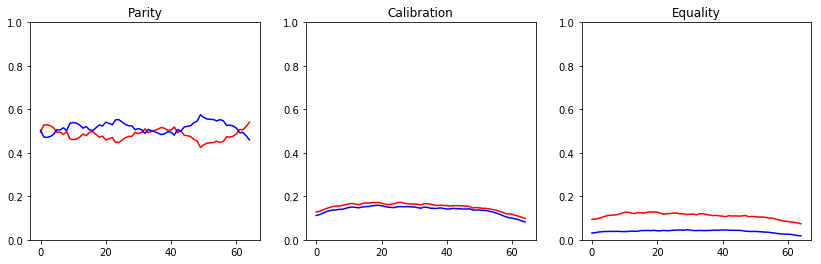

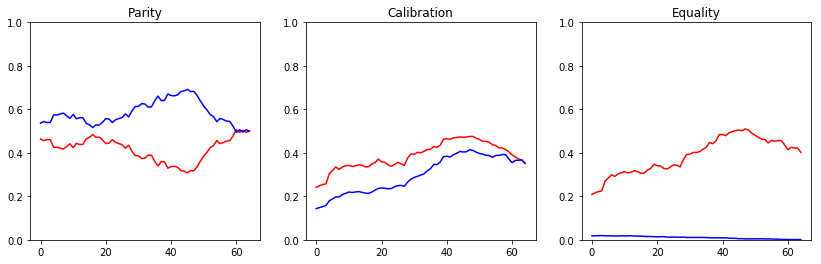

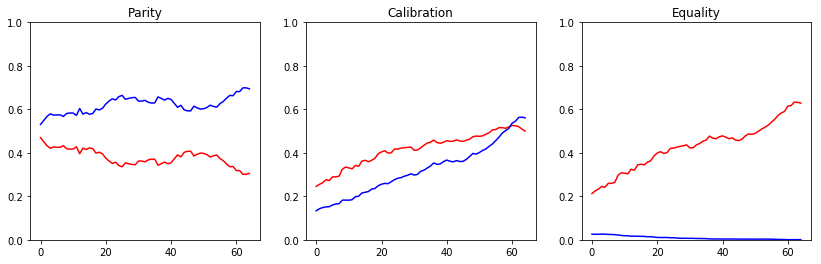

In [13]:
# plt.rcParams['figure.figsize'] = (16, 4)
# data = generate(1000,5,0.2,99)
print("Group 0 (red) underestimated")
data['y_pred'] = add_error_under(data, 0.1, 0.)['y']
plot_all(data, "under1.png")
data['y_pred'] = add_error_under(data, 0.5, 0.)['y']
plot_all(data, "under5.png")
data['y_pred'] = add_error_under(data, 0.75, 0.)['y']
plot_all(data, "under75.png")

Group 1 (blue) overestimated
        trend0  trend1   cor  dist   sig
parity    0.28   -0.28 -1.00  0.11  0.38
cal      -5.21   -5.49  0.97  0.03  0.01
eq        0.45  -12.26  0.20  0.05  0.00


        trend0  trend1   cor  dist  sig
parity   -3.78    3.78 -1.00  0.13  0.0
cal      -7.81   -9.41  0.79  0.07  0.0
eq       14.11   -7.75 -0.66  0.33  0.0


        trend0  trend1   cor  dist   sig
parity   -5.53    5.53 -1.00  0.13  0.00
cal      -6.43   -7.69  0.56  0.09  0.01
eq       19.22   -6.75 -0.82  0.37  0.00




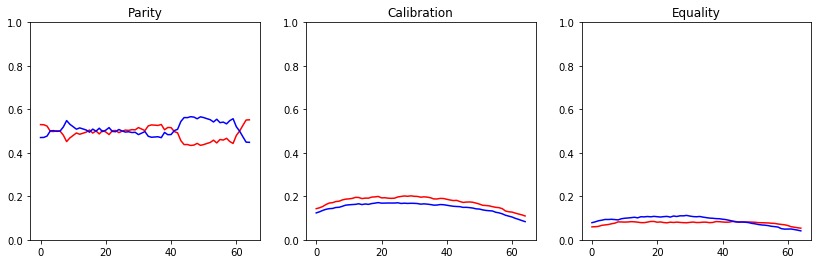

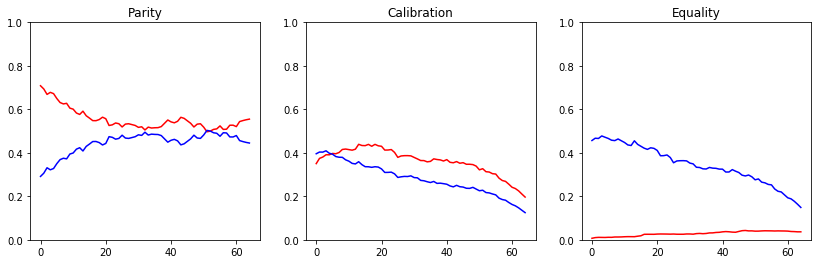

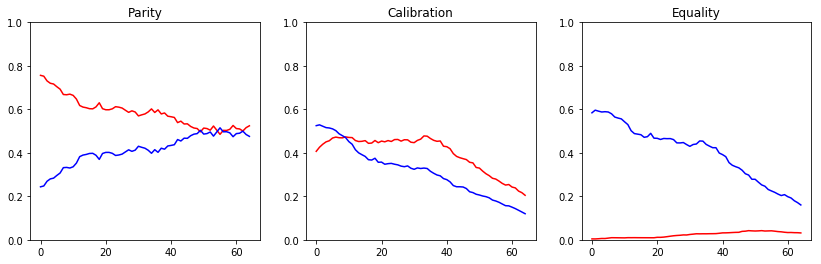

In [14]:
print("Group 1 (blue) overestimated")
data['y_pred'] = add_error_over(data, 0.1, 0.)['y']
plot_all(data, "over1.png")
data['y_pred'] = add_error_over(data, 0.5, 0.)['y']
plot_all(data, "over5.png")
data['y_pred'] = add_error_over(data, 0.75, 0.)['y']
plot_all(data, "over75.png")

Group 0 (red) underestimated, Group 1 (blue) overestimated
        trend0  trend1   cor  dist   sig
parity    1.54   -1.54 -1.00  0.14  0.85
cal      -5.32   -4.84  0.97  0.02  0.88
eq       -5.25  -16.43  0.49  0.24  0.00


        trend0  trend1   cor  dist   sig
parity    4.38   -4.38 -1.00  0.14  0.00
cal      -7.42    8.40  0.03  0.06  0.03
eq       -3.22  -97.26 -0.17  0.51  0.00


        trend0  trend1   cor  dist   sig
parity    3.05   -0.25 -0.29  0.21  0.00
cal      -0.91    3.75  0.25  0.10  0.26
eq       -0.10 -133.97  0.05  0.53  0.00




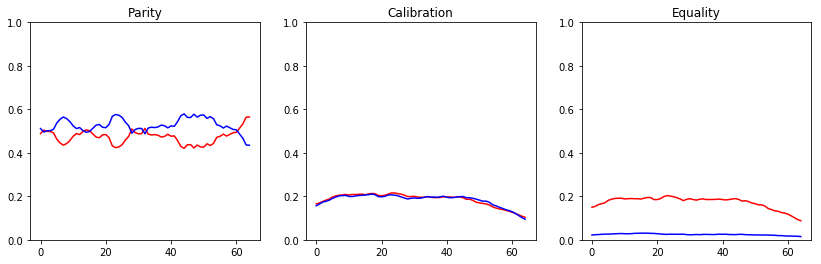

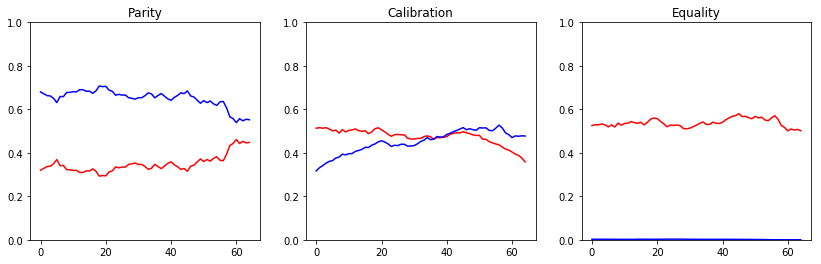

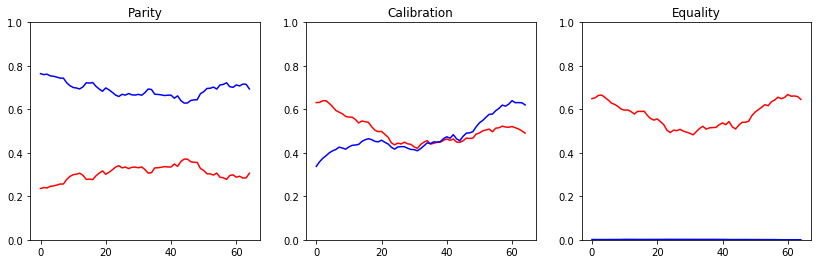

In [15]:
print("Group 0 (red) underestimated, Group 1 (blue) overestimated")
data['y_pred'] = add_error_under_over(data, 0.1, 0.)['y']
plot_all(data, "over_under1.png")
data['y_pred'] = add_error_under_over(data, 0.5, 0.)['y']
plot_all(data, "over_under5.png")
data['y_pred'] = add_error_under_over(data, 0.75, 0.)['y']
plot_all(data, "over_under75.png")

In [31]:
import time

# run simulations many times and average scorecard results
start = time.time()
print("Group 0 underestimated")
print(diagnose_average(data, add_error_under, 0.1, 10))
print(diagnose_average(data, add_error_under, 0.5, 10))
print(diagnose_average(data, add_error_under, 0.75, 10))
end = time.time()
print(end - start)

print("Group 1 overestimated")
print(diagnose_average(data, add_error_over, 0.1, 10))
print(diagnose_average(data, add_error_over, 0.5, 10))
print(diagnose_average(data, add_error_over, 0.75, 10))

print("Group 0 underestimated, Group 1 overestimated")
print(diagnose_average(data, add_error_under_over, 0.1, 10))
print(diagnose_average(data, add_error_under_over, 0.5, 10))
print(diagnose_average(data, add_error_under_over, 0.75, 10))

Group 0 underestimated
        trend0  trend1   cor  dist   sig
parity    1.45   -1.45 -1.00  0.11  0.63
cal      -3.61   -3.54  0.98  0.02  0.08
eq       -2.34  -12.58  0.38  0.14  0.00
        trend0  trend1   cor  dist  sig
parity   -0.34    0.34 -1.00  0.10  0.0
cal       8.15   10.54  0.86  0.06  0.0
eq        8.36  -37.54 -0.67  0.38  0.0
        trend0  trend1   cor  dist  sig
parity   -3.65    3.65 -1.00  0.14  0.0
cal       8.40    7.42  0.77  0.08  0.0
eq        6.44  -31.81 -0.73  0.42  0.0
166.9934742450714
Group 1 overestimated
        trend0  trend1   cor  dist   sig
parity    0.75   -0.75 -1.00  0.10  0.19
cal      -4.03   -4.39  0.97  0.03  0.01
eq        3.95  -11.46  0.05  0.06  0.56
        trend0  trend1   cor  dist  sig
parity   -3.63    3.63 -1.00  0.13  0.0
cal      -7.30   -8.96  0.77  0.07  0.0
eq       17.20   -7.73 -0.65  0.32  0.0
        trend0  trend1   cor  dist  sig
parity   -5.03    5.03 -1.00  0.13  0.0
cal      -6.71   -7.68  0.59  0.09  0.0
eq       

In [18]:
errs=pd.DataFrame(index=[['trend0','trend1','cor','dist','sig']])
e = get_all_errs(data, sliding_kendall_parity, window=100, step=10)

In [19]:
e

[-4.361, 4.361, -1.000, 0.140, 0.000]

In [23]:
f = np.add(e,e)
f

array([ -8.723e+00,   8.723e+00,  -2.000e+00,   2.801e-01,   5.652e-10])

In [24]:
f/2

array([ -4.361e+00,   4.361e+00,  -1.000e+00,   1.400e-01,   2.826e-10])

In [29]:
def diagnose_average(df, add_err, frac, n):
    errs=pd.DataFrame(index=[['trend0','trend1','cor','dist','sig']])
# generate new synthetic error
    df['y_pred'] = add_err(df, frac, 0.)['y']
# initialize scores
    errs['parity'] = get_all_errs(df, sliding_kendall_parity, window=100, step=10)
    errs['cal'] = get_all_errs(df, sliding_kendall_cal2, window=100, step=10)
    errs['eq'] = get_all_errs(df, sliding_kendall_eq, window=100, step=10)
    
    for i in range(n-1):
#         generate new synthetic error
        df['y_pred'] = add_err(df, frac, 0.)['y']
#         aggregate all scores
        errs['parity'] = np.add(get_all_errs(df, sliding_kendall_parity, window=100, step=10), errs['parity'])
        errs['cal'] = np.add(get_all_errs(df, sliding_kendall_cal2, window=100, step=10), errs['cal'])
        errs['eq'] = np.add(get_all_errs(df, sliding_kendall_eq, window=100, step=10), errs['eq'])
       
    errs['parity'] = errs['parity']/n
    errs['cal'] = errs['cal']/n
    errs['eq'] = errs['eq']/n
    return errs.transpose().round(2)

In [10]:
# TEST - merge functions

# # test = [[5,0],[4,1],[3,0],[2,1],[1,0],[0,1]]
# test = [[0,1],[1,0],[2,1],[3,0],[4,1],[5,0]]
# # test = [[1,0],[0,1],[5,0],[3,0],[2,1],[4,1]]
# print("merge_1_cal")
# res, c = count_inversions(test, 0, len(test)-1, merge_fnc=merge_1_cal)
# print(res)
# print("num inversions:", c)
# print("merge_0_cal")
# res, c = count_inversions(test, 0, len(test)-1, merge_fnc=merge_0_cal)
# print(res)
# print("num inversions:", c)
# print("merge_1_over")
# res, c = count_inversions(test, 0, len(test)-1, merge_fnc=merge_1_eq)
# print(res)
# print("num inversions:", c)
# print("merge_0_over")
# res, c = count_inversions(test, 0, len(test)-1, merge_fnc=merge_0_eq)
# print(res)
# print("num inversions:", c)
# print("merge_parity_0")
# res, c = count_inversions(test, 0, len(test)-1, merge_fnc=merge_parity_0)
# print(res)
# print("num inversions:", c)
# print("merge_parity_1")
# res, c = count_inversions(test, 0, len(test)-1, merge_fnc=merge_parity_1)
# print(res)
# print("num inversions:", c)

In [2]:
# #normalized versions
# plt.rcParams['figure.figsize'] = (4, 20)
# data = generate(1000,5,0.2,99)
# plot_all(data, 0.9)
# # plot_all(data, 0.75)
# plot_all(data, 0.5)
# # plot_all(data, 0.25)
# plot_all(data, 0.1)

In [3]:
def get_all_errs(df, err, window=100, step=10):
    err0,err1 = err(df, window, step)
    errs=[]
    r0=stats.zscore(range(len(err0)))
    r1=stats.zscore(range(len(err1)))
    c0=stats.pearsonr(err0,r0)[0]
    
    c1=stats.pearsonr(err1,r1)[0]
#     print(c0,np.std(r0),np.std(err0))
    errs.append(c0 * (np.std(r0)/np.std(err0)))
    errs.append(c1 * (np.std(r1)/np.std(err1)))
    errs.append(stats.pearsonr(err0,err1)[0])
#     errs.append(np.linalg.norm(np.array(err0) - np.array(err1)))
    diffs = np.abs(np.array(err0) - np.array(err1))
    
    errs.append(np.sum(diffs) / len(err0))
    errs.append(stats.ttest_ind(err0,err1)[1])
    return errs

def norm(x):
    x = (x - np.mean(x))/np.std(x)
    

In [4]:
def plot_all_one_fig(data, props, filename): 
    rows= len(props)
    height = rows*3
    for r in props:
        plt.figure(figsize=(12, height))
        plt.subplot(rows,3,1) # equivalent to: plt.subplot(2, 2, 1)
        data['y_pred'] = add_error(data, r, 0.)['y']
        e01,e11 = sliding_kendall_parity(data, window=100, step=10)
        plt.plot(e01, color='red')
        plt.plot(e11, color='blue')
        plt.ylim([0,1])
        plt.title("Parity")

        plt.subplot(rows,3,2) # equivalent to: plt.subplot(2, 2, 1)
        e01,e11 = sliding_kendall_calibration(data, window=100, step=10)
        plt.plot(e01, color='red')
        plt.plot(e11, color='blue')
        plt.ylim([0,1])
        plt.title("Calibration")

        plt.subplot(rows,3,3) # equivalent to: plt.subplot(2, 2, 1)
        e00,e10 = sliding_kendall_eq(data, window=100, step=10)
        plt.ylim([0,1])
        plt.plot(e00, color='red')
        plt.plot(e10, color='blue')
        plt.title("Equality")
    for ax in axarr:
        ax.label_outer()
    plt.show()
#     plt.save(filename)

#     synth_errs = diagnose_k(data, 'synth_0.9')
#     print(synth_errs.round(2))

In [5]:
def plot_all_one_fig(data, props, filename): 
    rows= len(props)
#     plt.figure(figsize=(12, height))
    f, a = plt.subplots(rows, 3, sharex='col', sharey='row')
    f.suptitle('Synthetic data: vary amount of underestimation.')
#     print(a[0])
#     #first row with titles
#     data['y_pred'] = add_error(data, props[0], 0.)['y']
#     e01,e11, t0, t1 = sliding_kendall_parity(data, window=100, step=10)
#     a[0][0].plot(e01, color='red')
#     a[0][0].plot(e11, color='blue')
#     a[0][0].set_ylim([0,1])
#     a[0][0].set_title("Parity")

#     plt.subplot(rows,3,2) # equivalent to: plt.subplot(2, 2, 1)
#     e01,e11, t0, t1 = sliding_kendall_calibration(data, window=100, step=10)
#     a[0][1].plot(e01, color='red')
#     a[0][1].plot(e11, color='blue')
#     a[0][1].set_ylim([0,1])
#     a[0][1].set_title("Calibration")

#     plt.subplot(rows,3,3) # equivalent to: plt.subplot(2, 2, 1)
#     e00,e10, t0, t1 = sliding_kendall_eq(data, window=100, step=10)
#     a[0][2].set_ylim([0,1])
#     a[0][2].plot(e00, color='red')
#     a[0][2].plot(e10, color='blue')
#     a[0][2].set_title("Equality")
    
    for i in range(len(props)):
        print(i)
        data['y_pred'] = add_error(data, props[i], 0.)['y']
        e01,e11,t0,t1 = sliding_kendall_parity(data, window=100, step=10)
        a[i][0].plot(e01, color='red')
        a[i][0].plot(e11, color='blue')
        a[i][0].set_ylim([0,1])

        plt.subplot(rows,3,2) # equivalent to: plt.subplot(2, 2, 1)
        e01,e11,t0,t1 = sliding_kendall_calibration(data, window=100, step=10)
        a[i][1].plot(e01, color='red')
        a[i][1].plot(e11, color='blue')
        a[i][1].set_ylim([0,1])

        plt.subplot(rows,3,3) # equivalent to: plt.subplot(2, 2, 1)
        e00,e10,t0,t1 = sliding_kendall_eq(data, window=100, step=10)
        a[i][2].set_ylim([0,1])
        a[i][2].plot(e00, color='red')
        a[i][2].plot(e10, color='blue')
        
    for ax in a.flat:
        ax.set(xlabel='rank', ylabel='error')
# Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in a.flat:
        ax.label_outer()
    plt.show()
#     plt.save(filename)

#     synth_errs = diagnose_k(data, 'synth_0.9')
#     print(synth_errs.round(2))

In [6]:
# plt.rcParams['figure.figsize'] = (10, 20)
plt.rcParams['figure.figsize'] = (10, 5)
# plot_all_one_fig(data, [0.1,0.25,0.5,0.75,0.9], "synth_errs.pdf")
plot_all_one_fig(data, [0.1,0.5,0.9], "synth_errs.pdf")

NameError: name 'data' is not defined

In [ ]:
def diagnose_t(df):
     
#     dfs= run(data_g,data_y,data_X)
    
    errs=pd.DataFrame(index=[['trend0','trend1','cor','dist','sig']])
    
    #statistical parity
    errs['parity'] = get_all_errs(df, sliding_kendall_parity, window=3, step=2)
        
    #Calibration
    errs['cal'] = get_all_errs(df, sliding_kendall_cal2, window=3, step=2)
        
    #Equalized Odds
    errs['eq'] = get_all_errs(df, sliding_kendall_eq, window=3, step=2)
        
    return errs

In [ ]:
def diagnose_k(df):
     
#     dfs= run(data_g,data_y,data_X)
    
    errs=pd.DataFrame(index=[['trend0','trend1','cor','dist','sig']])
    #statistical parity
    errs['parity'] = get_all_errs(df, sliding_kendall_parity, window=100, step=10)
        
    #Calibration
    errs['cal'] = get_all_errs(df, sliding_kendall_cal2, window=100, step=10)
        
    #Equalized Odds
    errs['eq'] = get_all_errs(df, sliding_kendall_eq, window=100, step=10)
        
    return errs

In [ ]:
# d=[1,3,5,2,7,4,9,6,8]
d = pd.DataFrame()
d['y_pred']=[9,7,5,8,3,6,1,4,2]
d['y']=[9,8,7,6,5,4,3,2,1]
d['g']=[1,1,1,0,1,0,1,0,0]
errs = diagnose_t(d)
print(errs.round(2))

In [87]:
a=[]
b=[]


stats.pearsonr([0,1,1,2],[0,1,1,1])

(0.816, 0.184)

In [91]:
stats.pearsonr([0,1,1,2],[0,1,1,1])[0]

0.816

In [96]:
np.linalg.norm(np.array([0,1,1,2]) - np.array([0,0,0,0]))

2.449

In [97]:
stats.ttest_ind([0,1,1,2],[0,0,0,0])

Ttest_indResult(statistic=2.4494897427831779, pvalue=0.049825262780576751)